In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
checks = pd.read_csv('AnalysisFeb7.csv')

# Strip whitespace and make case insensitive

In [3]:
checks['Purchase'] = checks.Purchase.map(lambda x: x if type(x)!=str else x.lower())
checks['Category'] = checks.Category.map(lambda x: x if type(x)!=str else x.lower())

In [4]:
checks['Purchase'] = checks['Purchase'].str.strip()
checks['Category'] = checks['Category'].str.strip()

In [5]:
checks = checks.fillna('No data')

# De-duplication

In [6]:
checks.Purchase.replace('ballistics labs', 'ballistics lab', inplace=True)
checks.Purchase.replace('car repair and seizure', 'car repair', inplace=True)
checks.Purchase.replace('file maker license', 'filemaker', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('accurint', 'lexis nexis', inplace=True)
checks.Purchase.replace('k9 training', 'k9s', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('repair for seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('repair of seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('server', 'server purchase', inplace=True)
checks.Purchase.replace('raid apparel', 'raid jacket', inplace=True)
checks.Purchase.replace('seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('seized car repair', 'car repair', inplace=True)
checks.Purchase.replace('seized cars', 'car repair', inplace=True)
checks.Purchase.replace('undercover car purchase', 'undercover car', inplace=True)

# Group by purchase type

In [7]:
purchase_obj = checks.groupby('Purchase')

In [8]:
amounts_spent = purchase_obj.amount.agg('sum')

In [9]:
amounts = pd.DataFrame(amounts_spent)

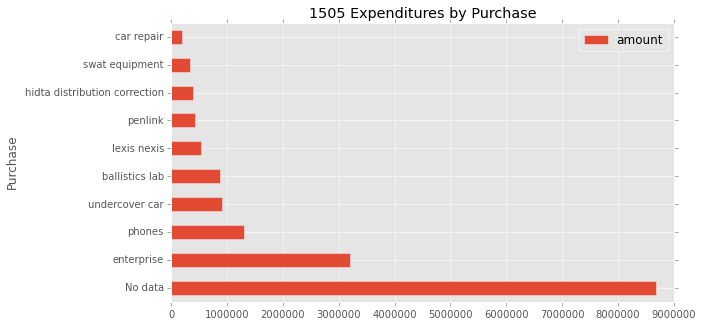

In [10]:
amounts.sort_values('amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Purchase')

In [11]:
amounts.sum()

amount    17913902.3
dtype: float64

# Group by routine/surveillance classification

In [12]:
class_obj = checks.groupby('Category')

In [13]:
amounts_by_class = class_obj.amount.agg('sum')

In [14]:
amounts_category = pd.DataFrame(amounts_by_class)

In [15]:
amounts_category['Category'] = amounts_category.index

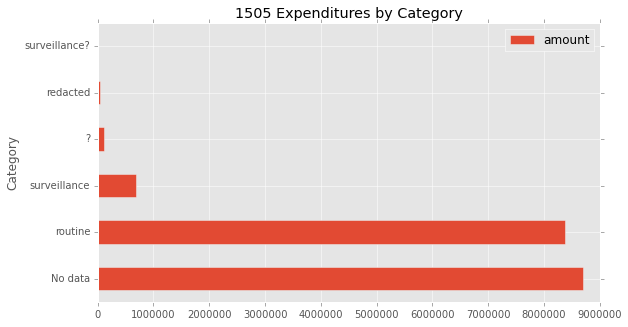

In [16]:
amounts_category.sort_values('amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Category')

# Generate HTML from processed list

In [20]:
checks.to_html('checks.html')